In [16]:
import sys
import os
import zipfile
import numpy as np
import pandas as pd

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
from python_scripts import *


In [17]:
###unzip file
zip_files = [
    "../test_data/chr1_Contiguous1KSNP.zip",
    "../test_data/chr1_Random1KSNP.zip"
]
for zf in zip_files:
    with zipfile.ZipFile(zf, "r") as z:
        z.extractall("test_data")   
    print(f"Unzipped: {zf}")

Unzipped: ../test_data/chr1_Contiguous1KSNP.zip
Unzipped: ../test_data/chr1_Random1KSNP.zip


In [18]:
##read and process data
##random snp
RandomSNP = pd.read_csv("test_data/chr1_Random1KSNP.raw", sep=r'\s+')
RandomSNP = RandomSNP.iloc[:, 6:].to_numpy()
##Contiguous snp
ContiguousSNP = pd.read_csv("test_data/chr1_Contiguous1KSNP.raw", sep=r'\s+')
ContiguousSNP = ContiguousSNP.iloc[:, 6:].to_numpy()

simulate MoM using RandomSNP


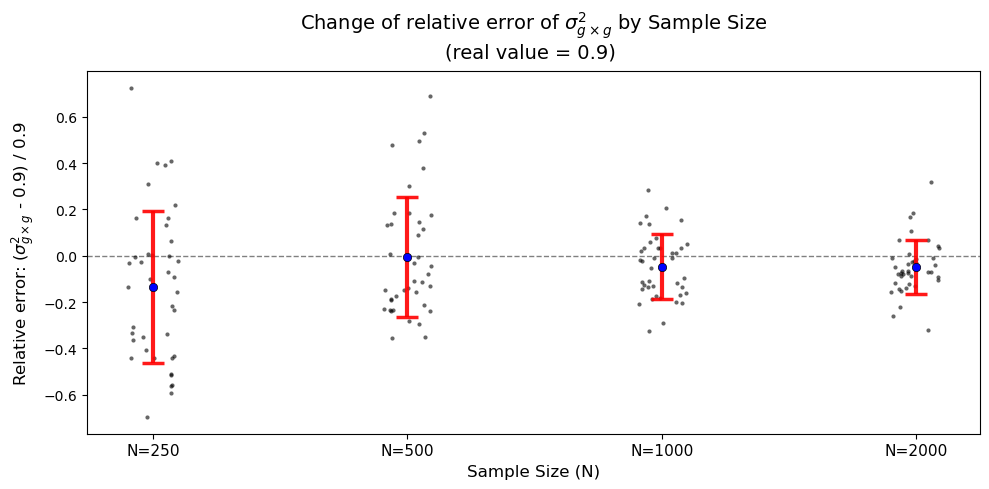

simulate MoM using ContiguousSNP


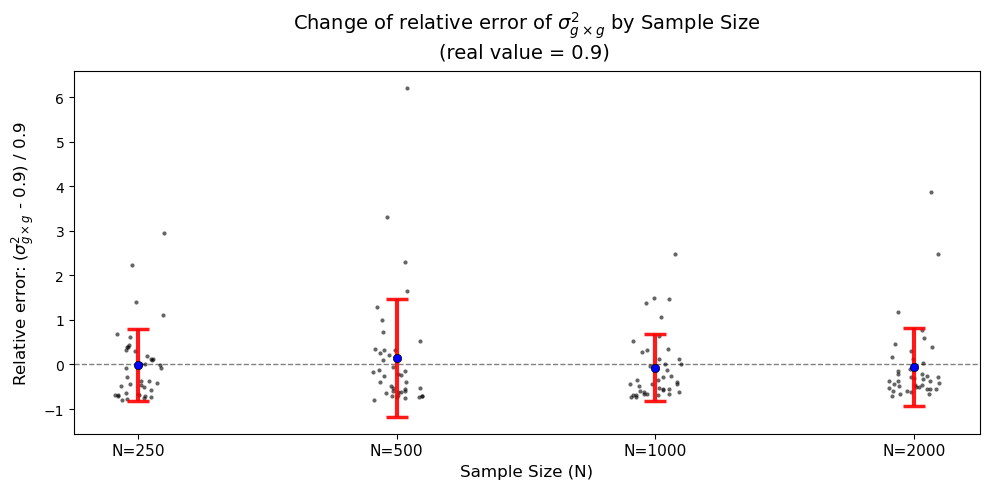

In [25]:
#set parameter
n_mc = 40
sample_sizes = [250, 500, 1000, 2000]

## experiment1: a toy example to show Random snp work
print("simulate MoM using RandomSNP")
dfs_random = [run_experiment_MC(RandomSNP[:n, :100], n_mc) for n in sample_sizes]

plot_relative_error_accross_sample_size(
    *dfs_random, 
    basic_individual=250, col_num=0, real_value=0.9
)
## experiment2: a toy example to show Contiguous snp does not work
print("simulate MoM using ContiguousSNP")
dfs_contig = [run_experiment_MC(ContiguousSNP[:n, :100], n_mc) for n in sample_sizes]

plot_relative_error_accross_sample_size(
    *dfs_contig, 
    basic_individual=250, col_num=0, real_value=0.9
)
